### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Loading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\Practo\Recruitment_Data.csv')

In [3]:
# Viewing the first 5 rows
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [4]:
# Dimenisions of the data
df.shape

(446, 4)

In [5]:
# Summary statistics of the date
df.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


### Checking the null values

In [6]:
df.isna().sum()

attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64

In [7]:
#Checking the unique values in recruitment_source column where we have missing values
unique_sources = df['recruiting_source'].unique()
print(f"Unique Recruiting Sources: {unique_sources}")

Unique Recruiting Sources: ['Applied Online' nan 'Campus' 'Referral' 'Search Firm']


In [8]:
missing_val_percentage = round(df['recruiting_source'].isna().sum()/len(df)*100)
print(f"There is {missing_val_percentage}% data missing from recruiting_source.")

There is 46% data missing from recruiting_source.


In [9]:
#Given the significant percentage of missing values, imputing them with methods like k-NN or summary statistics may introduce biases or underfit the actual patterns in the data.
#Using more advanced imputation techniques could potentially lead to overfitting or the introduction of noise, especially if the missing values represent a unique or specific condition.
#I've decided to impute the missing values as "Walk-in" or "Direct Interviews," which is suitable given the context of this data.

In [10]:
# Replace missing values in 'recruiting_source' with the category 'Walk In'.
df.fillna("Walk In",inplace=True)

In [11]:
# Checking if the dataset contains duplicate values
df.duplicated().sum()

0

### Getting Average Sales Numbers and Attrition Numbers

In [12]:
# Group the df by the "recruiting_source" column
grouped = df.groupby("recruiting_source").agg(
    total_attrition=("attrition", "sum"),  # Calculate the total attrition for each recruiting source
    total_recruits=("attrition", "count"),  # Count the total number of recruits for each source
    average_sales=("sales_quota_pct", "mean")  # Calculate the average sales quota percentage for each source
).reset_index()  # Reset the index to make the resulting DataFrame more readable


# Calculate the average attrition rate for each recruiting source
grouped['average_attrition'] = round(grouped['total_attrition'] / grouped['total_recruits'] * 100, 2)

#We will sort the df to find the recuriting_source with lowest attrition  rate and high average sales
grouped.sort_values(by=["average_sales","average_attrition"],ascending=[0,1])


# Walk-in interviews are the primary source of recruits for the company, followed by online recruits.
# Walk-in hires exhibit the highest average sales, indicating strong performance, with online recruits following closely.
# Walk-in interviews demonstrate the lowest average attrition, suggesting better retention, followed by online recruits.

,recruiting_source,total_attrition,total_recruits,average_sales,average_attrition
4,Walk In,27,205,1.168109,13.17
0,Applied Online,32,130,1.058590,24.62
2,Referral,15,45,1.023198,33.33
1,Campus,16,56,0.908035,28.57
3,Search Firm,5,10,0.886960,50.00


### EDA

#### Attrition Analysis by Recruiting Sources:
* Optimal sources are determined by their lower attrition rates.
* Missing data, assumed as direct or walk-in recruits, show the lowest attrition.
* Applied Online and campus recruitment are next, while referrals and search firms exhibit the highest attrition, with search firms identified as the least favorable in terms of attrition performance.

Text(0, 0.5, 'Average_Attrition')

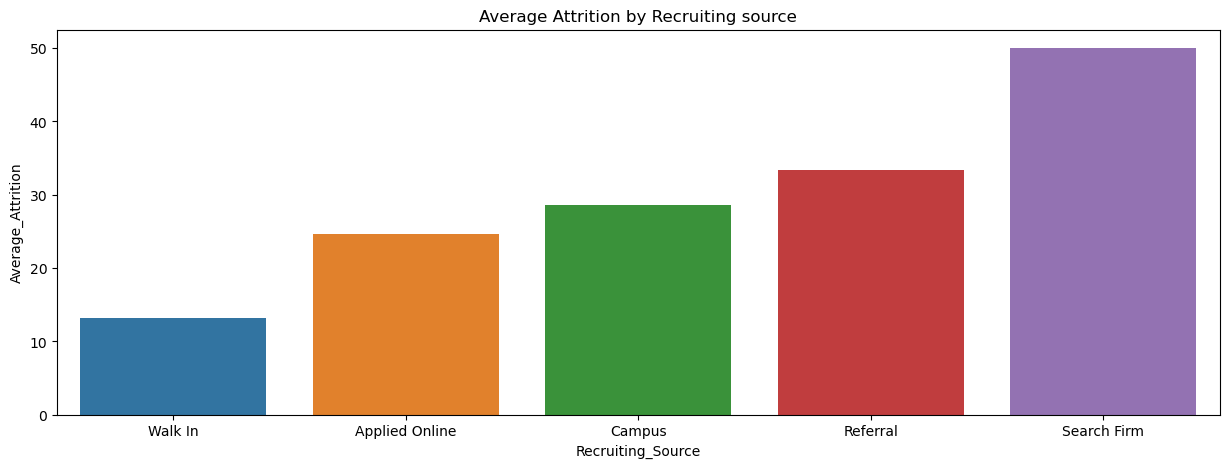

In [13]:
plt.figure(figsize=(15,5))
sn.barplot(data=grouped,x="recruiting_source",y="average_attrition",
          order=grouped.sort_values("average_attrition").recruiting_source)
plt.title("Average Attrition by Recruiting source")
plt.xlabel("Recruiting_Source")
plt.ylabel("Average_Attrition")

#### Sales Performance by Source:
* Optimal recruiting sources are identified by their highest average sales.
* Missing data, presumed as direct or walk-in recruits, exhibit the highest average sales.
* Applied Online and referrals are also strong performers, while campus and search firm sources demonstrate lower average sales, with search firms being the least favorable in terms of sales performance.

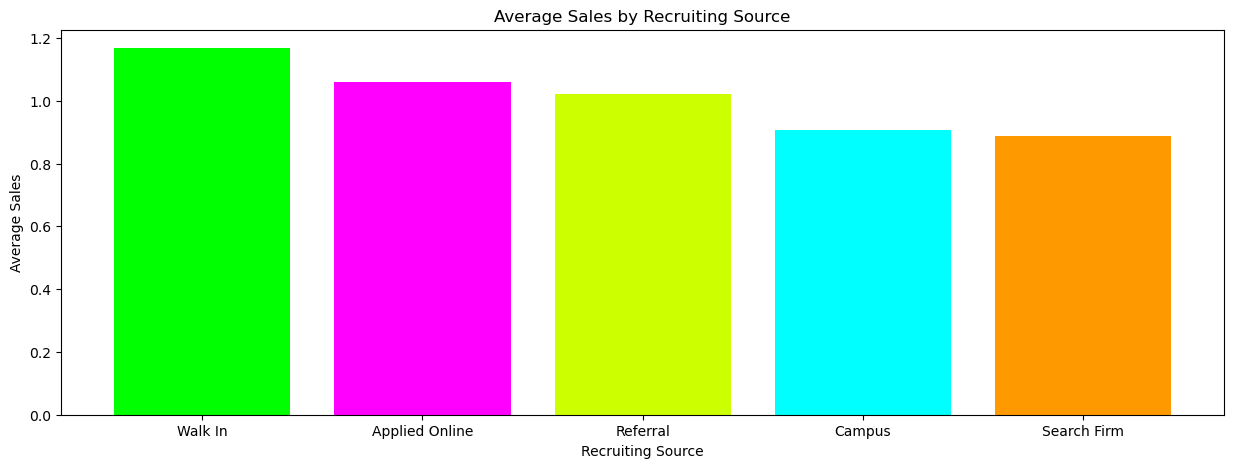

In [14]:
grouped_sorted = grouped.sort_values("average_sales", ascending=False)

# Customize the colors for the bars
colors = ["#00ff00", "#ff00ff", "#ccff00", "#00ffff", "#ff9900"]

plt.figure(figsize=(15, 5))
plt.bar(grouped_sorted['recruiting_source'], grouped_sorted['average_sales'], color=colors)
plt.title("Average Sales by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Average Sales")
plt.show()

### Conclusion
* Based on our EDA, Walk-in and Online Recruitment emerge as the most effective strategies. 
* These approaches exhibit the lowest attrition rates and highest average sales, making them optimal choices for recruitment.
* These findings suggest that focusing on these recruitment strategies can contribute positively to the company's overall performance and employee retention.